# Data visualization and posterior validation of scaling

In [19]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [20]:
input_images = "./images"
input_annotations = "./kitti_annotations/"

images = os.listdir(input_images)
annotations = os.listdir(input_annotations)

In [21]:
random_filename = random.choice(images)
annotation_filename = random_filename.replace(".jpg", ".txt")

In [22]:
print(random_filename)
print(annotation_filename)

000068_jpg.rf.360bc1a53779abea2a70f6691b0b2cf0.jpg
000068_jpg.rf.360bc1a53779abea2a70f6691b0b2cf0.txt


In [23]:
image = Image.open(os.path.join(input_images, random_filename))

rectangles = []

with open(os.path.join(input_annotations, annotation_filename), 'r') as file:
    # Read .txt annotation file: format <object_type> <truncation> <occlusion> <alpha> <left> <top> <right> <bottom> <height> <width> <length> <x> <y> <z> <rotation_y>
    lines = file.readlines()
    # Extract bounding box coordinates in image
    for line in lines:
        str_vec = line.split(" ")
        rectangles.append(
            [float(str_vec[4]), float(str_vec[5]), float(str_vec[6]), float(str_vec[7])]
        )

In [24]:
draw = ImageDraw.Draw(image)
for rectangle in rectangles:
    draw.rectangle(rectangle, outline="red", width=2)

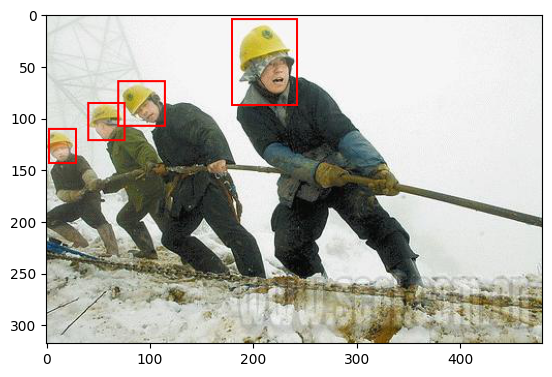

In [25]:
plt.imshow(image)

## Function for resizing image and corresponding bounding boxes:

In [45]:
def resize_file(filename, width=284, height=284, input_images="./images/", input_annot="./kitti_annotations/", plot=True):
    """
    Given a filename, path to images and annotations, and output width and height, return a resized image and annotation
    """
    #with Image.open(os.path.join(input_images, filename)) as img:
    img = Image.open(os.path.join(input_images, filename))
    scaled_img = img.resize((width, height))
    
    original_w, original_h = img.size
    scale_w, scale_h = width/original_w, height/original_h
     
    annotation_filename = random_filename.replace(".jpg", ".txt")
    
    scaled_rectangles = []
    
#    try: # In case there are no helmets
    with open(os.path.join(input_annot, annotation_filename), 'r') as file:
        # Read .txt annotation file: format <object_type> <truncation> <occlusion> <alpha> <left> <top> <right> <bottom> <height> <width> <length> <x> <y> <z> <rotation_y>
        lines = file.readlines()
        # Extract bounding box coordinates in image
        for line in lines:
            str_vec = line.split(" ")
            scaled_rectangles.append(
                [float(str_vec[4])*scale_w, float(str_vec[5])*scale_h, float(str_vec[6])*scale_w, float(str_vec[7])*scale_h]
            )
            print(str_vec)

    if plot:
        draw = ImageDraw.Draw(scaled_img)
        for rectangle in scaled_rectangles:
            draw.rectangle(rectangle, outline="red", width=2)
        plt.imshow(scaled_img)


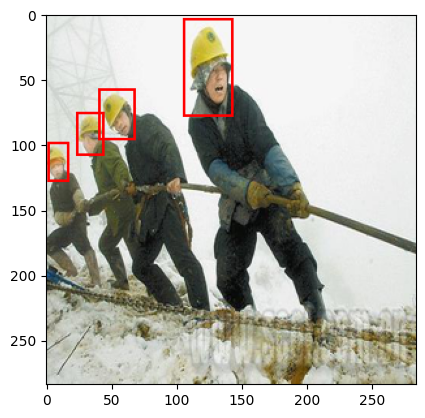

In [46]:
resize_file(random_filename)

## Check if all the image files have annotation files

In [44]:
for file in images:
    annotation_filename = random_filename.replace(".jpg", ".txt")
    if annotation_filename not in annotations:
        print(f"No annotation for image: {file}")

## Different interpolation methods

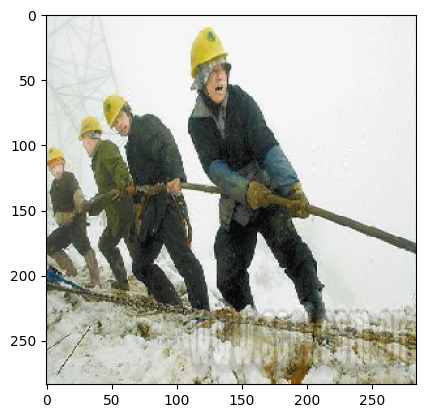

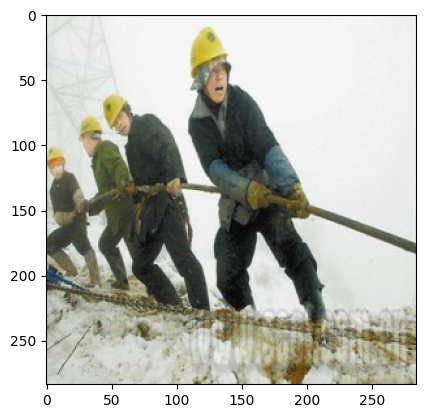

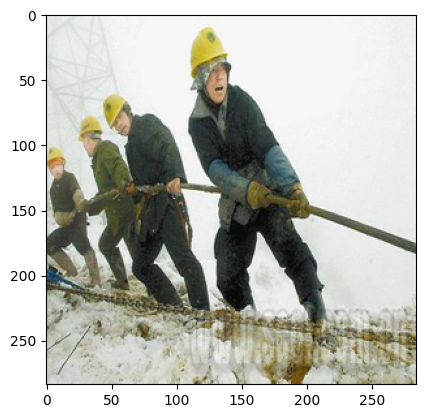

In [53]:
img = Image.open(os.path.join(input_images, random_filename))
interp_method = [Image.NEAREST, Image.BILINEAR, Image.BICUBIC]

for interp in interp_method:
    plt.figure()
    plt.imshow(img.resize((284, 284), interp))